In [185]:
### automatically refresh the buffer

%load_ext autoreload
%autoreload 2

### solve the auto-complete issue

%config Completer.use_jedi = False

### lvl 1 setups

import sys
sys.path.append('/portal1/dell/GitHub/WAYS')
sys.path.append('/portal1/dell/GitHub/sanctuary')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

### lvl 2 setups (systerm)

import os
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib as mpl
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from numpy import hstack
from matplotlib import pyplot
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [186]:
from numpy import polyfit, poly1d
from stats import cr

In [187]:
import os
import glob
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from stats import cr
from gistool import basemap, stack_image, stack_shp, stack_hatch, stack_shp_cn, ncslice
from spatial import upscale
import statsmodels.formula.api as smf
from scipy.stats.mstats import theilslopes
from scipy.stats import kendalltau
import cartopy.crs as ccrs

import pandas as pd
import scipy.stats as scs
import matplotlib.pyplot as plt

import climate_indices as indices
from climate_indices import compute
from climate_indices import utils, indices

In [188]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression

In [189]:
shp='/portal3/gis/LMRB_Boundary/Lancang_Mekong_Basin/Lancang_Mekong_Basin.shp'
shp_mrb = '/portal3/gis/LMRB_Boundary/Lancang_Mekong_Basin/Mekong_Basin.shp'
shp_lrb = '/portal3/gis/LMRB_Boundary/Lancang_Mekong_Basin/Lancang_Basin.shp'

In [190]:
ds_fddry = xr.open_dataset('weekly_data/flashd_weekly_dry.nc')
ds_ssr = xr.open_dataset('weekly_data/ssr_weekly_lmrb.nc')
ds_str = xr.open_dataset('weekly_data/str_weekly_lmrb.nc')
ds_tmax = xr.open_dataset('weekly_data/tmax_weekly_lmrb.nc')
ds_tmin = xr.open_dataset('weekly_data/tmin_weekly_lmrb.nc')
ds_tmean = xr.open_dataset('weekly_data/tmean_weekly_lmrb.nc')
ds_dewt = xr.open_dataset('weekly_data/dewt_weekly_lmrb.nc')
ds_u10 = xr.open_dataset('weekly_data/u10_weekly_lmrb.nc')
ds_v10 = xr.open_dataset('weekly_data/v10_weekly_lmrb.nc')
ds_pet = xr.open_dataset('weekly_data/pet_weekly_lmrb_penman.nc')

In [191]:
ds_ssrd=ds_ssr.sel(time=((ds_ssr.time.dt.month == 1) | (ds_ssr.time.dt.month == 2) |(ds_ssr.time.dt.month == 3) |
                         (ds_ssr.time.dt.month == 4) |(ds_ssr.time.dt.month == 11) | (ds_ssr.time.dt.month == 12)))
ds_strd=ds_str.sel(time=((ds_str.time.dt.month == 1) | (ds_str.time.dt.month == 2) |(ds_str.time.dt.month == 3) |
                         (ds_str.time.dt.month == 4) |(ds_str.time.dt.month == 11) | (ds_str.time.dt.month == 12)))
ds_tmaxd=ds_tmax.sel(time=((ds_tmax.time.dt.month == 1) | (ds_tmax.time.dt.month == 2) |(ds_tmax.time.dt.month == 3) |
                         (ds_tmax.time.dt.month == 4) |(ds_tmax.time.dt.month == 11) | (ds_tmax.time.dt.month == 12)))
ds_tmind=ds_tmin.sel(time=((ds_tmin.time.dt.month == 1) | (ds_tmin.time.dt.month == 2) |(ds_tmin.time.dt.month == 3) |
                         (ds_tmin.time.dt.month == 4) |(ds_tmin.time.dt.month == 11) | (ds_tmin.time.dt.month == 12)))
ds_tmeand=ds_tmean.sel(time=((ds_tmean.time.dt.month == 1) | (ds_tmean.time.dt.month == 2) |(ds_tmean.time.dt.month == 3) |
                         (ds_tmean.time.dt.month == 4) |(ds_tmean.time.dt.month == 11) | (ds_tmean.time.dt.month == 12)))
ds_dewtd=ds_dewt.sel(time=((ds_dewt.time.dt.month == 1) | (ds_dewt.time.dt.month == 2) |(ds_dewt.time.dt.month == 3) |
                         (ds_dewt.time.dt.month == 4) |(ds_dewt.time.dt.month == 11) | (ds_dewt.time.dt.month == 12)))
ds_u10d=ds_u10.sel(time=((ds_u10.time.dt.month == 1) | (ds_u10.time.dt.month == 2) |(ds_u10.time.dt.month == 3) |
                         (ds_u10.time.dt.month == 4) |(ds_u10.time.dt.month == 11) | (ds_u10.time.dt.month == 12)))
ds_v10d=ds_v10.sel(time=((ds_v10.time.dt.month == 1) | (ds_v10.time.dt.month == 2) |(ds_v10.time.dt.month == 3) |
                         (ds_v10.time.dt.month == 4) |(ds_v10.time.dt.month == 11) | (ds_v10.time.dt.month == 12)))
ds_petd=ds_pet.sel(time=((ds_pet.time.dt.month == 1) | (ds_pet.time.dt.month == 2) |(ds_pet.time.dt.month == 3) |
                         (ds_pet.time.dt.month == 4) |(ds_pet.time.dt.month == 11) | (ds_pet.time.dt.month == 12)))

In [192]:
arr_fddry = ds_fddry.spei.values
arr_ssrd = ds_ssrd.ssr.values
arr_strd = ds_strd.str.values
arr_tmaxd = ds_tmaxd.t2m.values
arr_tmind = ds_tmind.t2m.values
arr_tmeand = ds_tmeand.t2m.values
arr_dewtd = ds_dewtd.d2m.values
arr_u10d = ds_u10d.u10.values
arr_v10d = ds_v10d.v10.values
arr_petd = ds_petd.pev.values

In [193]:
def calculate_Rn(ssr,str):
    Rn = (ssr + str)/1000000 #  J/(m2·d) to MJ/(m2·d)
    return Rn

def calculate_vpd_ea(tmax,tmin,tdew):
    es_Tmax = 0.6108 * np.exp((17.27 * (tmax-273.15)) / ((tmax-273.15) + 237.3))
    es_Tmin = 0.6108 * np.exp((17.27 * (tmin-273.15)) / ((tmin-273.15) + 237.3))
    es = (es_Tmax + es_Tmin) / 2  
    ea = 0.6108 * np.exp((17.27 * (tdew-273.15)) / ((tdew-273.15) + 237.3))
    vpd = es - ea
    return vpd,ea

def calculate_u2(uwind,vwind):
    u10 = np.sqrt((uwind)**2+(vwind)**2)
    u2 = (u10 * 4.87) / (np.log(678 - 5.42))
    return u2
    


## calculate variables

In [194]:
Rn_d = calculate_Rn(arr_ssrd,arr_strd)
vpd_d,ea_d = calculate_vpd_ea(arr_tmaxd,arr_tmind,arr_dewtd)
u2_d = calculate_u2(arr_u10d,arr_v10d)
Tmean_d = arr_tmeand

pet_d = arr_petd

## select variables during flash drought
Rn_d = np.where(~np.isnan(arr_fddry), Rn_d, np.nan)
vpd_d = np.where(~np.isnan(arr_fddry), vpd_d, np.nan)
ea_d = np.where(~np.isnan(arr_fddry), ea_d, np.nan)
u2_d = np.where(~np.isnan(arr_fddry), u2_d, np.nan)
Tmean_d = np.where(~np.isnan(arr_fddry), Tmean_d, np.nan)

pet_d = np.where(~np.isnan(arr_fddry), pet_d, np.nan)
varia_d = np.stack((Rn_d, vpd_d, ea_d, u2_d, Tmean_d), axis=3)

In [195]:
rf_d = np.full((102, 61, 5), np.nan)
for i in range(0,102):
    for j in range(0,61):
        vv = varia_d[:,i,j,:]
        pett = pet_d[:,i,j]
        if np.isnan(np.nanmean(vv)):
            continue
        else:            
            X_varia_d = vv[~np.isnan(vv)].reshape(int(vv[~np.isnan(vv)].shape[0]/5),5)
            y_pet_d = pett[~np.isnan(pett)]

            rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
            rf_model.fit(X_varia_d, y_pet_d)
            feature_importance = rf_model.feature_importances_

            rf_d[i,j,:] = feature_importance


### find the maximum variable¶

In [179]:
max_con = np.full((102, 61), np.nan)
for i in range(102):
    for j in range(61):
        my_array = np.array(rf_d[i,j])
        max_index = np.argmax(my_array)
        max_con[i,j] = max_index
max_con = np.where(~np.isnan(np.nanmean(pet_d,axis=0)), max_con, np.nan)

### find the second maximum variable

In [180]:
max_con2 = np.full((102, 61), np.nan)

for i in range(102):
    for j in range(61):
        my_array = np.array(rf_d[i, j])
        
        # Find the index of the second maximum value
        max_indices = np.argsort(my_array)[::-1]
        second_max_index = max_indices[1] if len(max_indices) > 1 else np.nan

        max_con2[i, j] = second_max_index

# Keep values in max_con where the corresponding mean in pet_d is not NaN
max_con2 = np.where(~np.isnan(np.nanmean(pet_d, axis=0)), max_con2, np.nan)


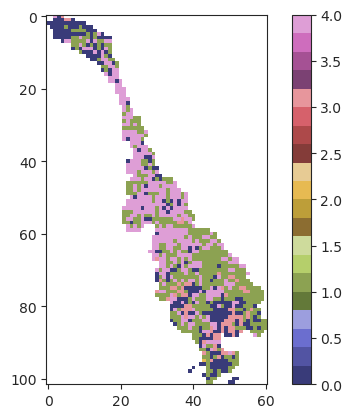

In [181]:
plt.imshow(max_con2,cmap='tab20b')
plt.colorbar()

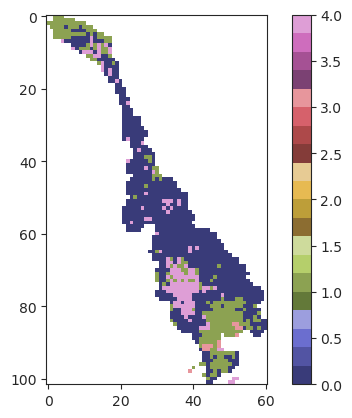

In [182]:
plt.imshow(max_con,cmap='tab20b')
plt.colorbar()

### Select LMRB,LRB,MRB's random forest

In [183]:
ds_lmrb_rf_d = xr.Dataset({'rf': (['var','lat','lon', ], rf_d.transpose(2,0,1))},
                            coords={'lon': (['lon'], ds_petd.lon.values),
                                    'lat': (['lat'], ds_petd.lat.values),
                                    'var': ('var', ['Rn','vpd','ea','u2','Tmean'])})
ds_lrb_rf_d,_ = ncslice(ds_lmrb_rf_d ,shp_lrb,18,index='LEGEND')
ds_mrb_rf_d,_ = ncslice(ds_lmrb_rf_d,shp_mrb,18,index='LEGEND')

arr_lmrb_rf_d = ds_lmrb_rf_d.rf.values[~np.isnan(ds_lmrb_rf_d.rf.values)]
arr_lrb_rf_d = ds_lrb_rf_d.rf.values[~np.isnan(ds_lrb_rf_d.rf.values)]
arr_mrb_rf_d = ds_mrb_rf_d.rf.values[~np.isnan(ds_mrb_rf_d.rf.values)]

In [184]:
v_array_lmrb = np.repeat(['Rn','vpd','ea','u2','Tmean'], 1336)
v_array_lrb = np.repeat(['Rn','vpd','ea','u2','Tmean'], 343)
v_array_mrb = np.repeat(['Rn','vpd','ea','u2','Tmean'], 1020)

df_lmrb = pd.DataFrame({'vari': v_array_lmrb, 'rf': arr_lmrb_rf_d})
df_lrb = pd.DataFrame({'vari': v_array_lrb, 'rf': arr_lrb_rf_d})
df_mrb = pd.DataFrame({'vari': v_array_mrb, 'rf': arr_mrb_rf_d})

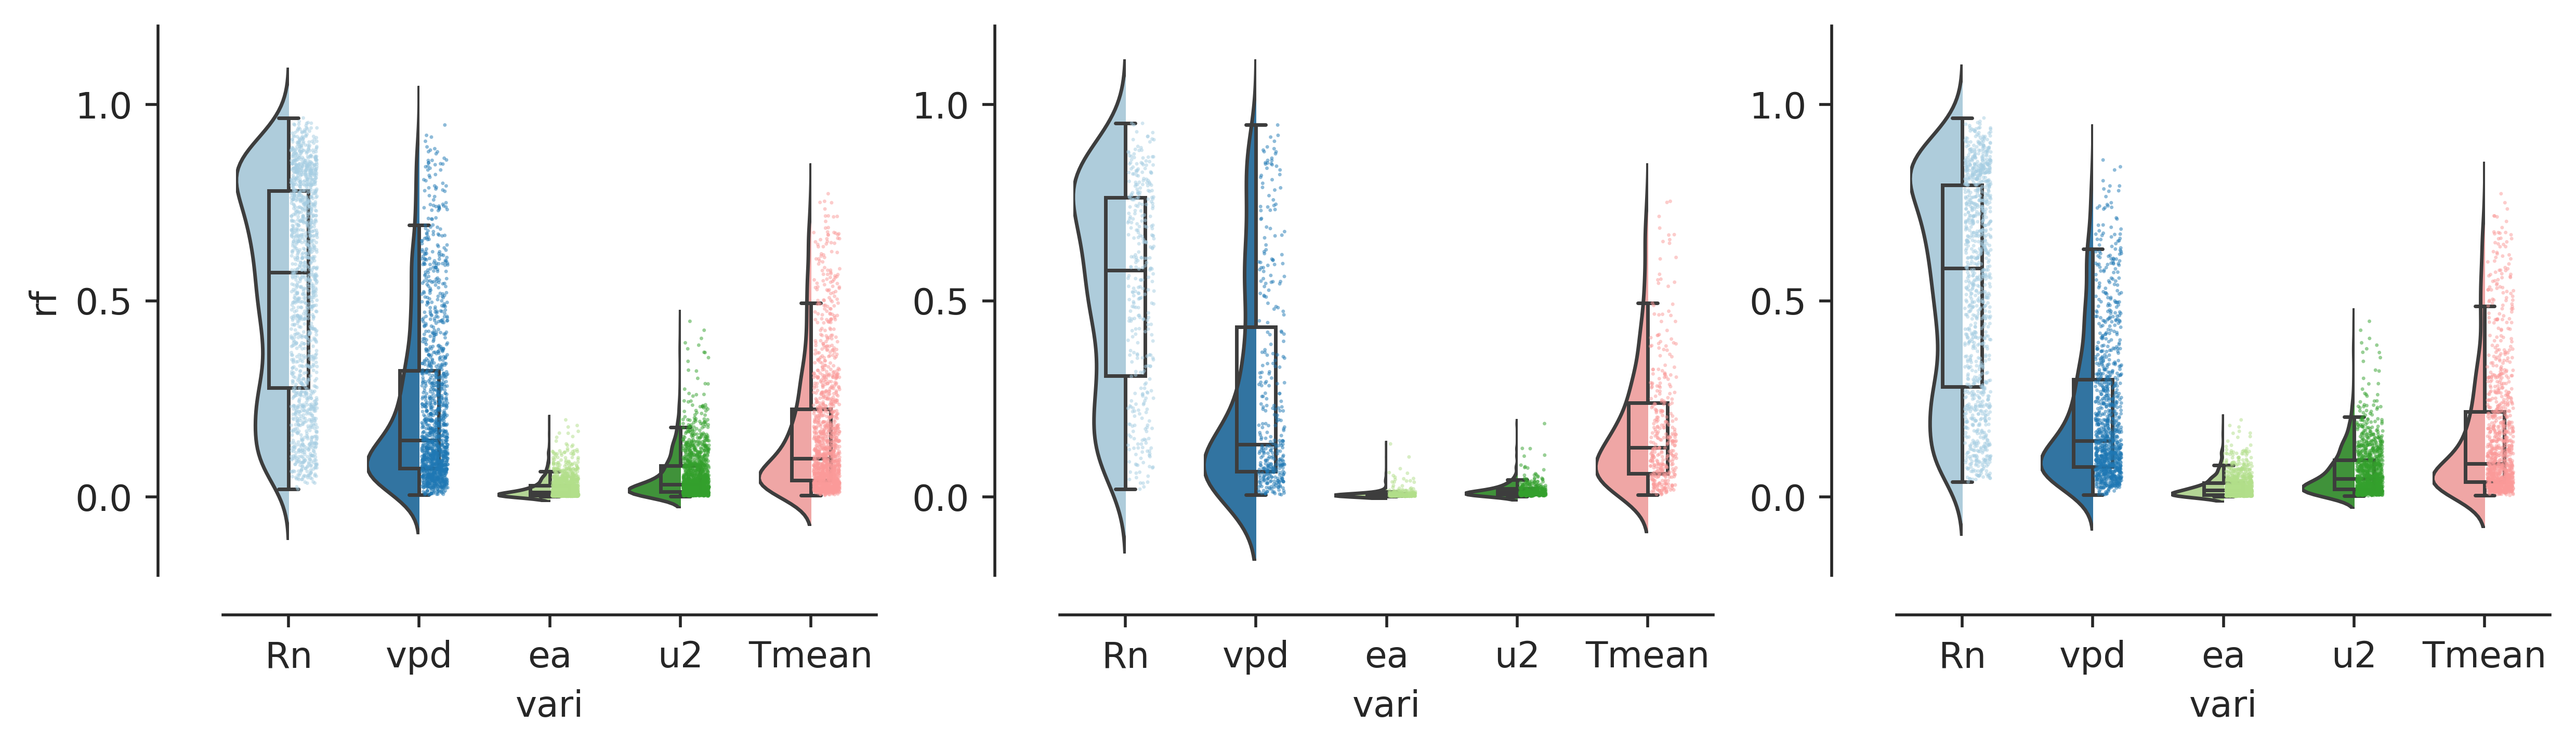

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
palette = 'Paired'

df_data = [df_lmrb, df_lrb, df_mrb]
fig, axes = plt.subplots(1, 3, figsize=(10, 3), dpi=500)  # 创建一个包含3个子图的画布，比例为1:3

for i, ax in enumerate(axes):
    sns.violinplot(x="vari", y="rf", data=df_data[i], hue="vari", dodge=False,
                   palette=palette, scale="area", inner=None, ax=ax, linewidth=1)  # 调整scale参数为"area"
    
    sns.set_style('ticks')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    for violin in ax.collections:
        bbox = violin.get_paths()[0].get_extents()
        x0, y0, width, height = bbox.bounds
        violin.set_clip_path(plt.Rectangle((x0, y0), width / 2, height, transform=ax.transData))

    sns.boxplot(x="vari", y="rf", data=df_data[i], saturation=1, showfliers=False,
                width=0.3, boxprops={'zorder': 3, 'facecolor': 'none'}, ax=ax, linewidth=1)
    old_len_collections = len(ax.collections)
    sns.stripplot(x="vari", y="rf", data=df_data[i], hue="vari", palette=palette, dodge=False, ax=ax, alpha=0.5,size=1)
    for dots in ax.collections[old_len_collections:]:
        dots.set_offsets(dots.get_offsets() + np.array([0.12, 0]))
    ax.set_xlim(-0.5,4.5)
    ax.set_ylim(-0.2,1.2)
    ax.tick_params(left=True,bottom=True) 
    ax.set_yticks([0,0.5,1])
    ax.legend_.remove()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_position(('data', -1))
    ax.spines['bottom'].set_position(('data', -0.3))
    if i != 0:
        ax.set_ylabel('')
plt.tight_layout()
plt.savefig('Fig_save/RF_con_dots.pdf')
plt.show()

# Select monthly, LMRB,LRB,MRB's random forest

In [50]:
var_d = [pet_d,Rn_d,vpd_d,ea_d,u2_d,Tmean_d]
names = locals()
month_d = ['jan_','feb_','mar_','apr_','nov_','dec_','dry_']
month_betw = [0,4,8,12,17,21,26]
var_nd = ['pet','Rn','vpd','ea','u2','Tmean']
for i,q in zip(month_d,month_betw):
    for j,k in zip(var_nd,var_d):

        ## monthly
        if i in ('jan_', 'feb_', 'mar_', 'nov_'):
            names[i+j+'_d'] = k.reshape(63,26,102,61)[:,q:q+4,:,:].reshape(63*4,102,61)
            names['dslmrb_'+i+j+'_d'] = xr.Dataset({j: (['time', 'lat', 'lon'], names[i+j+'_d'])},
                                        coords={'lon': (['lon'], ds_petd.lon.values),
                                                'lat': (['lat'], ds_petd.lat.values),
                                                'time': ('time', np.arange(0,63*4))})


        
        if i in ('apr_', 'dec_',):
            names[i+j+'_d'] = k.reshape(63,26,102,61)[:,q:q+5,:,:].reshape(63*5,102,61)
            names['dslmrb_'+i+j+'_d'] = xr.Dataset({j: (['time', 'lat', 'lon'], names[i+j+'_d'])},
                                        coords={'lon': (['lon'], ds_petd.lon.values),
                                                'lat': (['lat'], ds_petd.lat.values),
                                                'time': ('time', np.arange(0,63*5))})

        ## dry season total
        else:
            names[i+j+'_d'] = k.reshape(63,26,102,61)[:,0:26,:,:].reshape(63*26,102,61)
            names['dslmrb_'+i+j+'_d'] = xr.Dataset({j: (['time', 'lat', 'lon'], names[i+j+'_d'])},
                                        coords={'lon': (['lon'], ds_petd.lon.values),
                                                'lat': (['lat'], ds_petd.lat.values),
                                                'time': ('time', np.arange(0,63*26))})
        ## select LRB and MRB
        names['dslrb_'+i+j+'_d'],_ = ncslice(names['dslmrb_'+i+j+'_d'],shp_lrb,18,index='LEGEND')
        names['dsmrb_'+i+j+'_d'],_ = ncslice(names['dslmrb_'+i+j+'_d'],shp_mrb,18,index='LEGEND')

In [51]:
basin_ = ['lmrb','lrb','mrb']
for i in month_d:
    for j in var_nd:
        for k in basin_:
            
            names['arr_'+k+'_'+i+j+'_d'] = names['ds'+k+'_'+i+j+'_d'][j].values
            names['arr_'+k+'_'+i+j+'_d'] = names['arr_'+k+'_'+i+j+'_d'].reshape((names['arr_'+k+'_'+i+j+'_d'].shape[0]*
                                                                                 names['arr_'+k+'_'+i+j+'_d'].shape[1]*
                                                                                 names['arr_'+k+'_'+i+j+'_d'].shape[2]))
            names['arr_'+k+'_'+i+j+'_d'] = names['arr_'+k+'_'+i+j+'_d'][~np.isnan(names['arr_'+k+'_'+i+j+'_d'])]



In [52]:
for k in basin_:  
    for i in month_d:
        names['arr_'+k+'_'+i+'d'] = np.stack((names['arr_'+k+'_'+i+var_nd[1]+'_d'],
                                               names['arr_'+k+'_'+i+var_nd[2]+'_d'],
                                               names['arr_'+k+'_'+i+var_nd[3]+'_d'],
                                               names['arr_'+k+'_'+i+var_nd[4]+'_d'],
                                               names['arr_'+k+'_'+i+var_nd[5]+'_d'],
                                              ),axis=1)

In [55]:

for k in basin_:  
    basin_tt = np.full((7, 5), np.nan)
    for i,q in zip(month_d,np.arange(7)):
        X_varia_d = names['arr_'+k+'_'+i+'d']
        y_pet_d = names['arr_'+k+'_'+i+'pet'+'_d']

        rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
        rf_model.fit(X_varia_d, y_pet_d)
        feature_importance = rf_model.feature_importances_

        basin_tt[q,:] = feature_importance
    names['arr_'+k+'_'+'rf_d'] = basin_tt


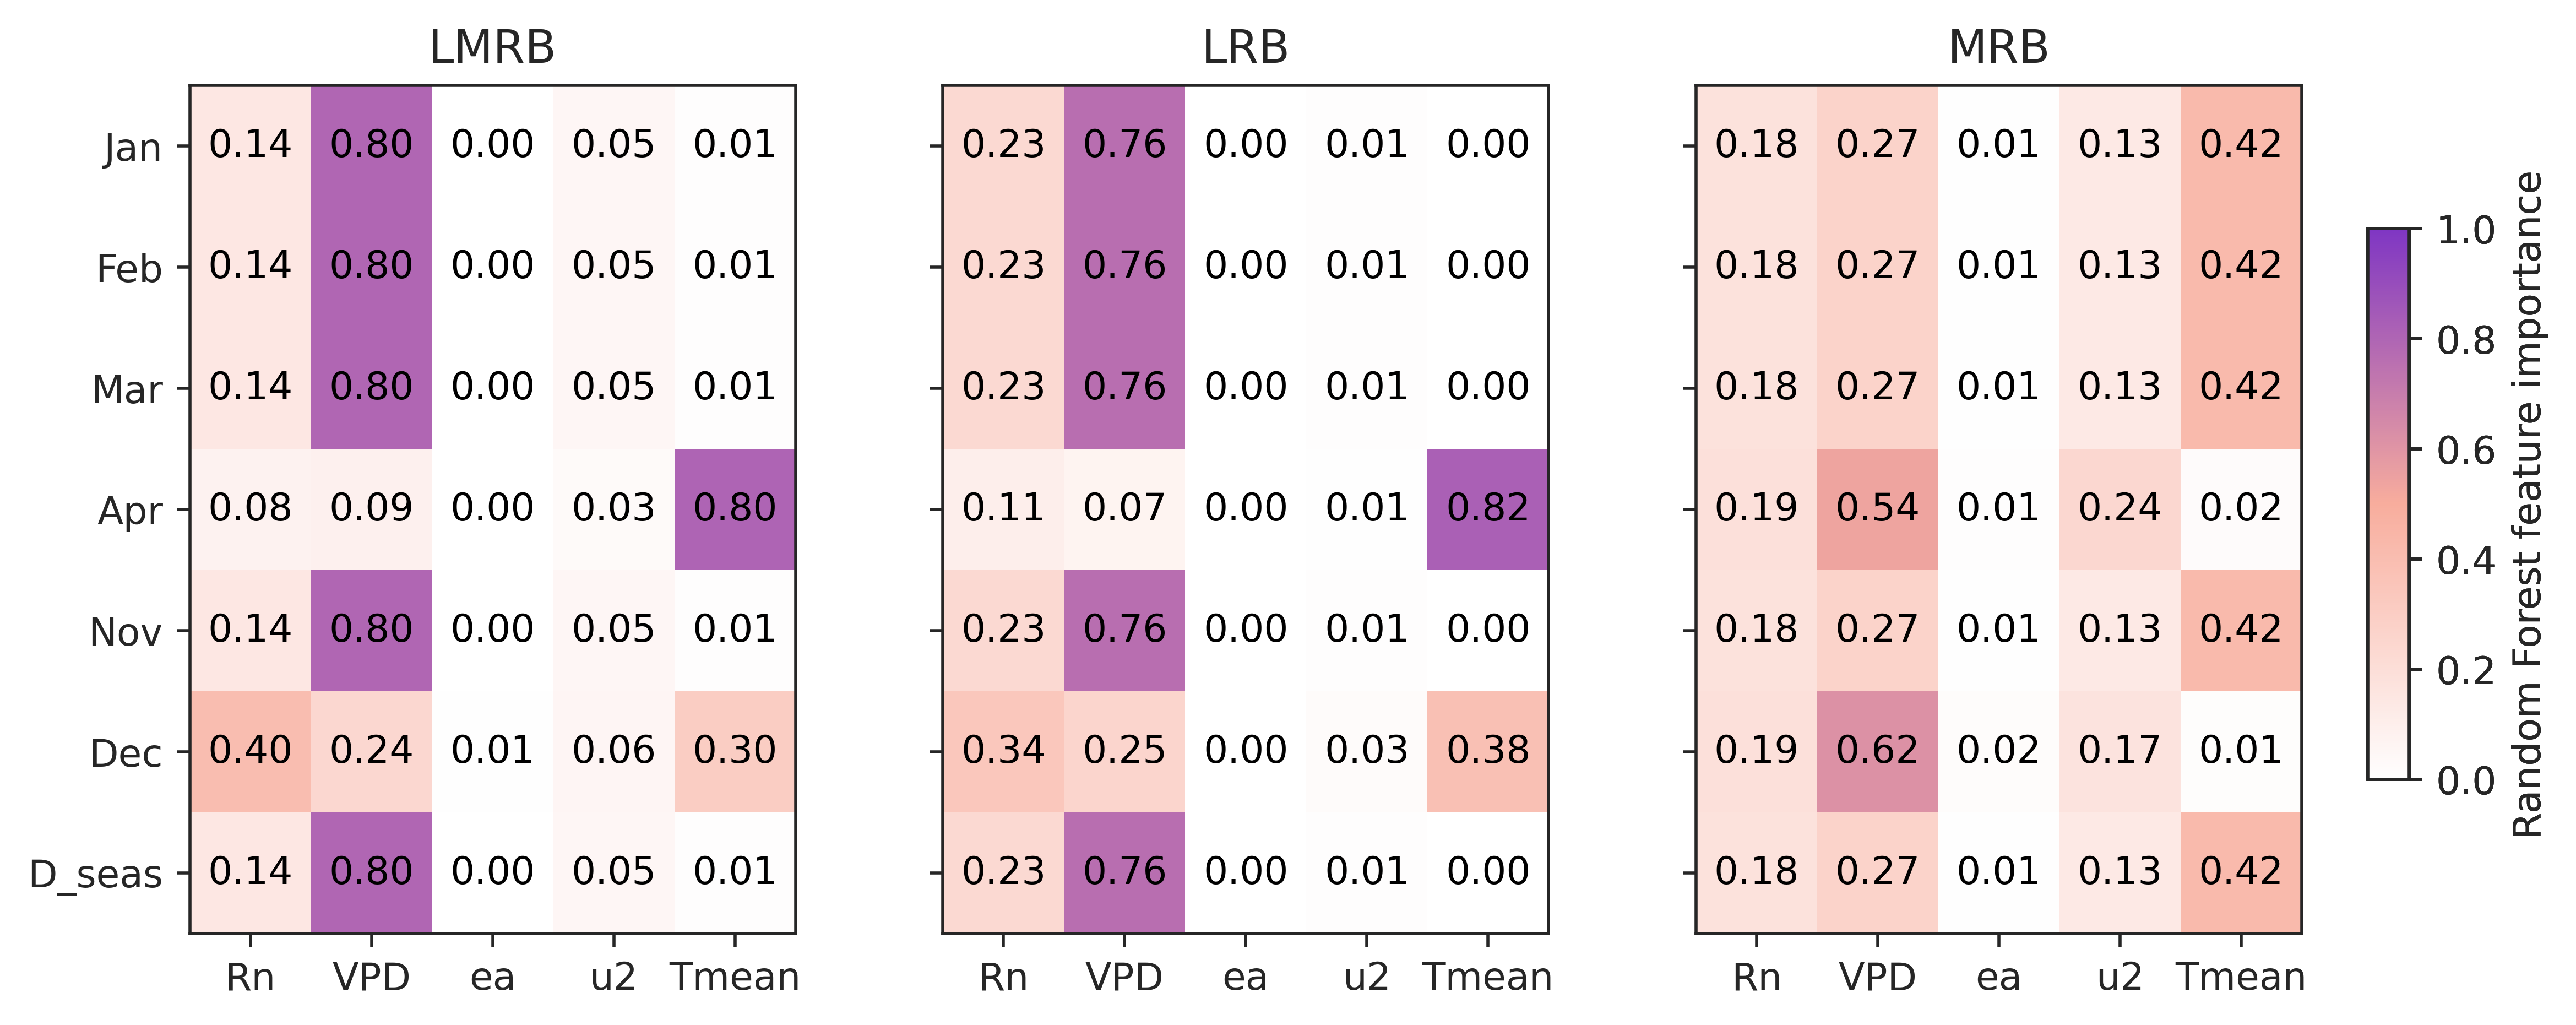

In [92]:
clist1 =['#ffffff','#f8ad9d','#7f36c3']
red1 = LinearSegmentedColormap.from_list('chaos',clist1)


basin_name = ['LMRB','LRB','MRB']
arr_rf_d = [arr_lmrb_rf_d,arr_lrb_rf_d,arr_mrb_rf_d,]
fig, ax = plt.subplots(1, 3, figsize=(10, 4), dpi=500)
images = []
for i, (qt, subplot, name) in enumerate(zip(arr_rf_d, ax.flat, basin_name)):
    im = subplot.imshow(qt, cmap=red1,interpolation='nearest',vmin=0,vmax=1)
    subplot.set_title(name)
    subplot.set_xticks(np.arange(qt.shape[1]))
    subplot.set_yticks(np.arange(qt.shape[0]))
    subplot.set_yticklabels([])
    subplot.set_xticklabels(['Rn','VPD','ea','u2','Tmean'])

    cax = fig.add_axes([0.92, 0.25, 0.015, 0.5]) 
    cbar = plt.colorbar(im, cax=cax,) # extend='max')
    cbar.set_label('Random Forest feature importance')
    im.set_clim(vmin=0.0, vmax=1.0)
    cbar.set_ticks([0.0, 0.2, 0.4, 0.6, 0.8,1.0])
    
    for row in range(qt.shape[0]):
        for col in range(qt.shape[1]):
            value = qt[row, col]
            if not np.isnan(value):  # Skip NaN values
                subplot.text(col, row, f'{value:.2f}', ha='center', va='center', color='black')

    if i == 0:
        subplot.set_yticklabels(['Jan','Feb','Mar','Apr','Nov','Dec','D_seas'])
    
#plt.tight_layout()
plt.savefig('Fig_save/RF_con_heat.pdf')
plt.show()

In [86]:
from matplotlib.colors import ListedColormap, BoundaryNorm
clist1 =['#afccdb','#3275a1','#b2d495','#409239','#efa6a6',]
cmap1 = LinearSegmentedColormap.from_list('chaos',clist1)
cmap2 = ListedColormap(clist1)

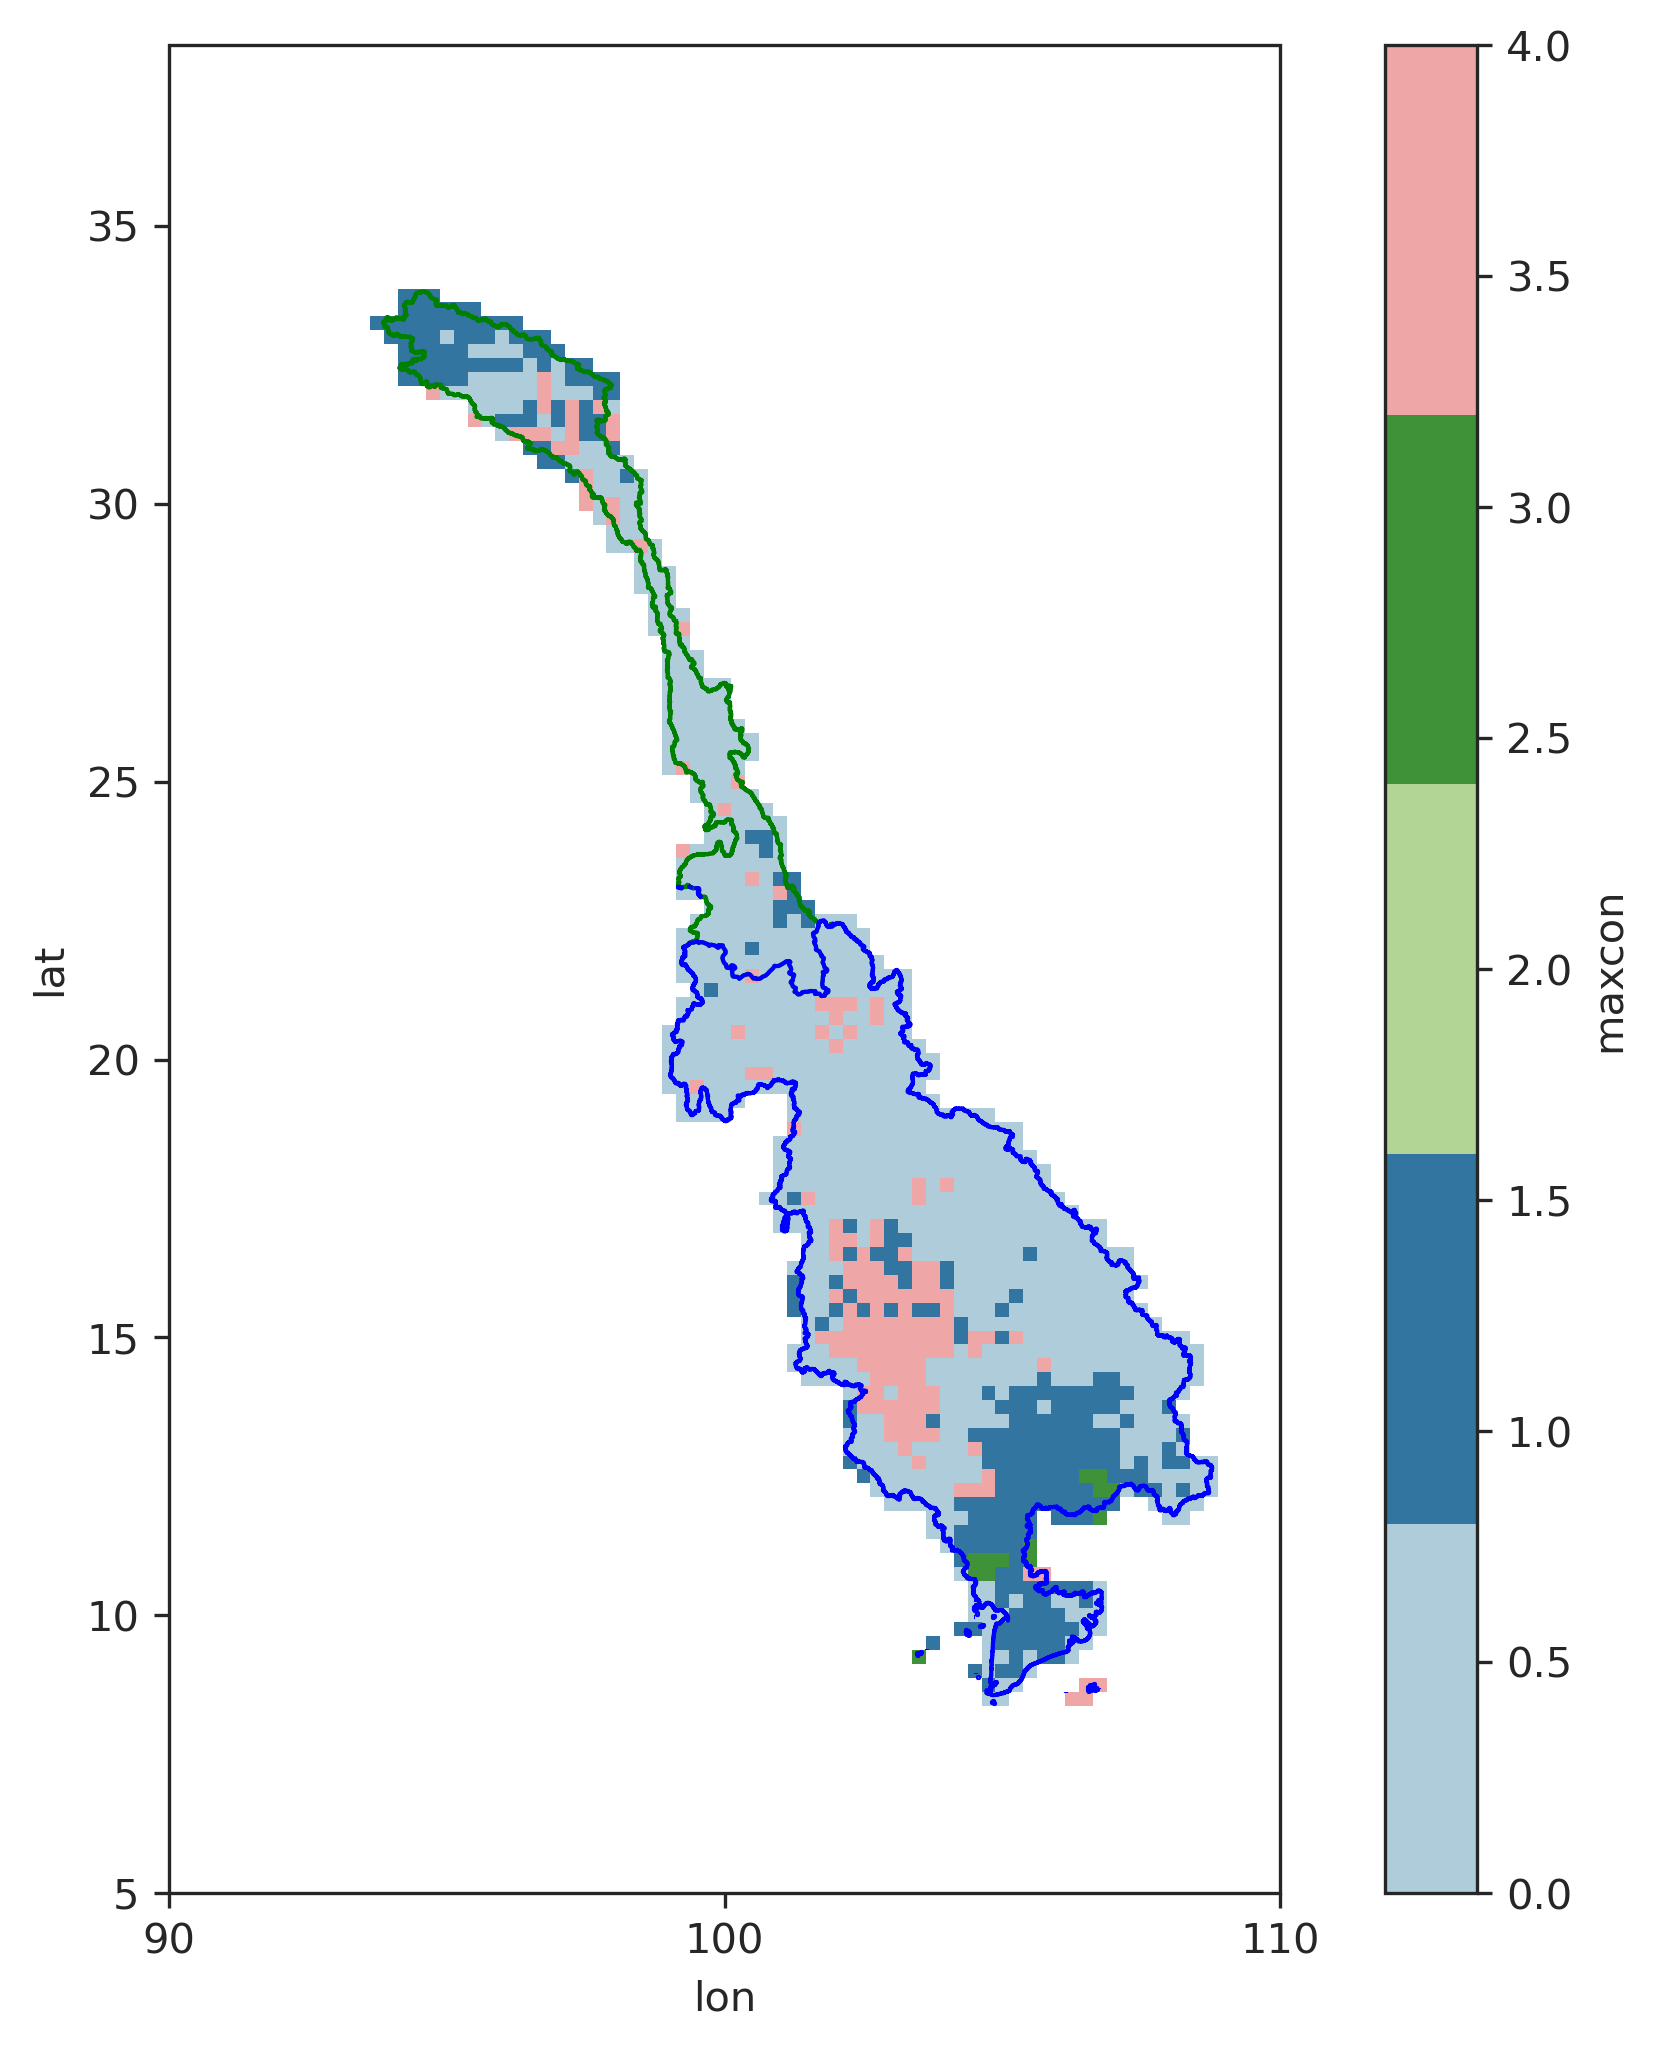

In [87]:
ds_maxcon = xr.Dataset({'maxcon': ([ 'lat', 'lon'], max_con)},
                    coords={'lon': (['lon'], ds_pet.lon.values),
                            'lat': (['lat'], ds_pet.lat.values),})

plt.figure(figsize=(9,8), dpi=300)

ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_xticks(np.linspace(-180, 180, 37))
ax.set_ylabel('Latitude',fontsize=10)
# y label and tick
ax.set_yticks(np.linspace(-90,90, 37))
ax.set_xlabel('Longitude',fontsize=10)

extent = [90,110, 5,38.255]
ax.set_extent(extent)


ds_maxcon.maxcon.plot(transform=ccrs.PlateCarree(),zorder=1,cmap=cmap2)
# ax = stack_shp(ax,shp ,facecolor='none', edgecolor='k', linewidth=1, alpha=1, zorder=2)
ax = stack_shp(ax,shp_lrb ,facecolor='none', edgecolor='g', linewidth=1, alpha=1, zorder=2)
ax = stack_shp(ax,shp_mrb ,facecolor='none', edgecolor='b', linewidth=1, alpha=1, zorder=2)

plt.savefig('Fig_save/RF_maxcon.pdf')
plt.show()